Hábitos de Asistencia al Teatro Musical (Muestra Curada 2011–2025)

Dataset derivado del Anuario de Estadísticas Culturales 2025, seleccionado y normalizado. Recoge una muestra estructurada sobre la evolución de la asistencia al teatro musical entre 2011 y 2025, con foco en tendencias, brechas de participación y patrones de consumo. Su objetivo es facilitar análisis claros y comparables, sin constituir un registro exhaustivo del sector.


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Index(['anio', 'total', 'hombres', 'mujeres', 'var_pct_total',
       'brecha_mujeres_hombres_pp', 'brecha_vs_hombres_pct'],
      dtype='object')


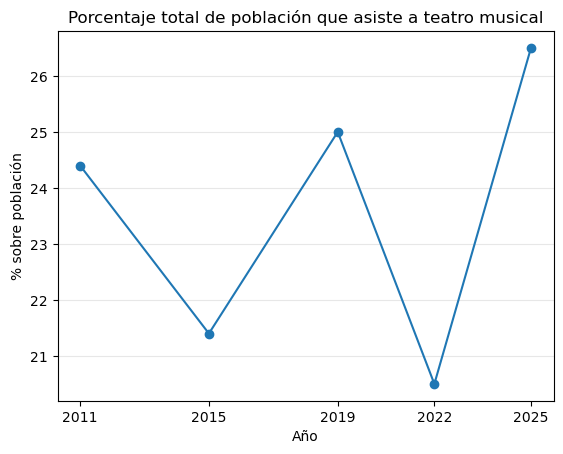

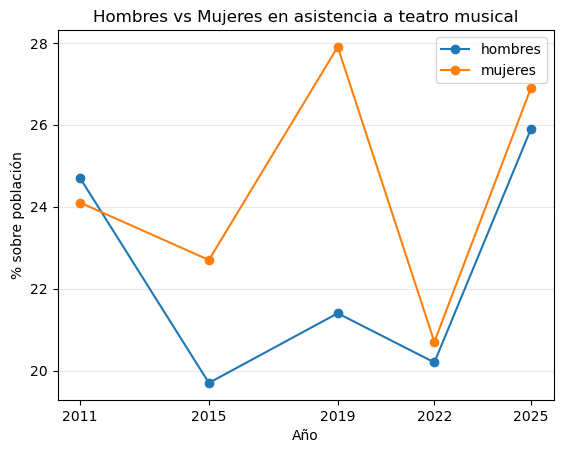

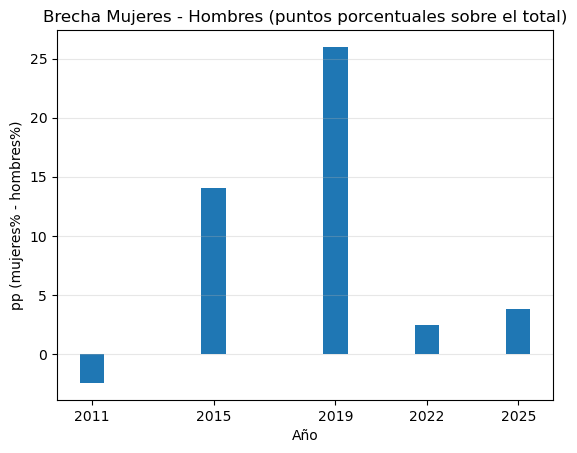

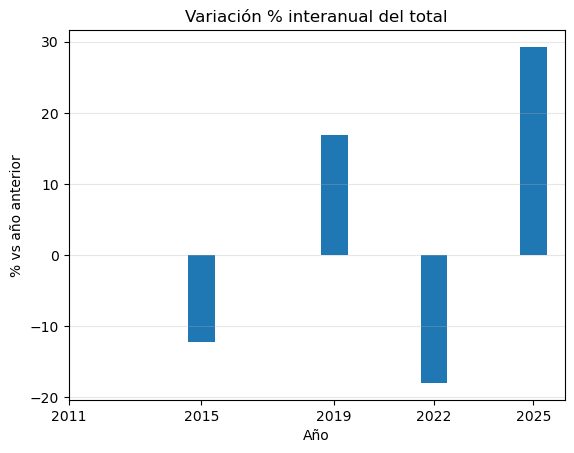

In [24]:

# 1. Cargar datos
df = pd.read_csv("teatro_musical_habitos_2011_2025_limpio.csv")  # adapta la ruta

# 2. Limpieza básica
print(df.columns)
# Quédate solo con las columnas relevantes
df = df[["anio", "total", "hombres", "mujeres"]]

df = df.copy()

# Si tu columna no se llama exactamente "anio", esto la detecta y la renombra.
# (por ejemplo: "año", "Año", "year", etc.)
year_candidates = ["anio", "año", "ano", "year", "Year", "Año"]
year_col = next((c for c in year_candidates if c in df.columns), None)
if year_col is None:
    raise KeyError(f"No encuentro columna de año. Columnas: {list(df.columns)}")
df = df.rename(columns={year_col: "anio"})

# ========= 1) Tipos numéricos =========
for c in ["total", "mujeres", "hombres"]:
    if c not in df.columns:
        raise KeyError(f"Falta la columna '{c}'. Columnas: {list(df.columns)}")
    df[c] = pd.to_numeric(df[c], errors="coerce")

df["anio"] = pd.to_numeric(df["anio"], errors="coerce").astype("Int64")
df = df.dropna(subset=["anio"]).sort_values("anio").reset_index(drop=True)

# ========= 2) Métricas (sin 'inf', sin cosas raras) =========
# VAR % total vs año anterior
df["var_pct_total"] = df["total"].pct_change() * 100
df["var_pct_total"] = df["var_pct_total"].replace([np.inf, -np.inf], np.nan)

# Brecha en puntos porcentuales SOBRE el total (estable para Power BI)
df["brecha_mujeres_hombres_pp"] = np.where(
    df["total"] > 0,
    ((df["mujeres"] / df["total"]) - (df["hombres"] / df["total"])) * 100,
    np.nan
)

# (Opcional) Brecha relativa vs hombres (ojo: explota si hombres ~0)
df["brecha_vs_hombres_pct"] = np.where(
    df["hombres"] > 0,
    ((df["mujeres"] - df["hombres"]) / df["hombres"]) * 100,
    np.nan
)

# Redondeo “presentación”
cols_round = ["var_pct_total", "brecha_mujeres_hombres_pp", "brecha_vs_hombres_pct"]
df[cols_round] = df[cols_round].round(2)

# ========= 3) Visualizaciones (Matplotlib) =========
x = df["anio"].astype(int).to_numpy()

# 1) Línea total
plt.figure()
plt.plot(x, df["total"].to_numpy(), marker="o")
plt.xticks(x)
plt.title("Porcentaje total de población que asiste a teatro musical")
plt.ylabel("% sobre población")
plt.xlabel("Año")
plt.grid(True, axis="y", alpha=0.3)
plt.show()

# 2) Línea hombres vs mujeres
plt.figure()
plt.plot(x, df["hombres"].to_numpy(), marker="o", label="hombres")
plt.plot(x, df["mujeres"].to_numpy(), marker="o", label="mujeres")
plt.xticks(x)
plt.title("Hombres vs Mujeres en asistencia a teatro musical")
plt.ylabel("% sobre población")
plt.xlabel("Año")
plt.grid(True, axis="y", alpha=0.3)
plt.legend()
plt.show()

# 3) Barras brecha (pp)
plt.figure()
plt.bar(x, df["brecha_mujeres_hombres_pp"].to_numpy())
plt.xticks(x)
plt.title("Brecha Mujeres - Hombres (puntos porcentuales sobre el total)")
plt.ylabel("pp (mujeres% - hombres%)")
plt.xlabel("Año")
plt.grid(True, axis="y", alpha=0.3)
plt.show()

# 4) Barras variación interanual (%)
plt.figure()
plt.bar(x, df["var_pct_total"].to_numpy())
plt.xticks(x)
plt.title("Variación % interanual del total")
plt.ylabel("% vs año anterior")
plt.xlabel("Año")
plt.grid(True, axis="y", alpha=0.3)
plt.show()


In [25]:
df.to_csv("teatro_musical_habitos_2011_2025_limpio.csv", index=False)
print("CSV limpio guardado correctamente.")


CSV limpio guardado correctamente.


Hábitos de asistencia al teatro musical (2011–2025)

1. Crecimiento estructural con punto de inflexión en 2025
La asistencia al teatro musical muestra una tendencia creciente a largo plazo, alcanzando su máximo histórico en 2025. Este año actúa como punto de consolidación tras un periodo de alta inestabilidad, indicando recuperación de la demanda y reactivación del consumo cultural.

2. Mercado cíclico y altamente sensible al contexto
El patrón temporal revela alta volatilidad, con caídas significativas en 2015 y 2022, seguidas de rebotes intensos en 2019 y 2025. El sector no crece de forma lineal: responde a shocks externos (económicos, sociales) y a ventanas de oportunidad.

3. Liderazgo sostenido del público femenino
Las mujeres mantienen tasas de asistencia superiores en todos los años analizados, actuando como driver estructural del mercado. El crecimiento del sector depende, en gran medida, de su comportamiento y fidelidad como audiencia principal.

4. Brecha de género no estable, pero persistente
La diferencia mujeres–hombres fluctúa en el tiempo, con picos relevantes en 2019 y una normalización relativa en 2025. Esto sugiere que la brecha no es fija, sino sensible al ciclo, y puede reducirse en fases de expansión del mercado.

5. Recuperación de 2025 con crecimiento transversal
En 2025 se observa una mejora generalizada en ambos segmentos, no solo en el dominante. Esto apunta a un escenario de reactivación amplia, donde el sector recupera volumen sin aumentar la desigualdad de participación.

Insight clave 

El teatro musical en España es un mercado cíclico, sensible al contexto y sostenido estructuralmente por el público femenino. El crecimiento reciente no elimina la volatilidad histórica, pero abre una ventana estratégica para consolidar hábitos, diversificar audiencias y reducir brechas en fases expansivas.